<a href="https://colab.research.google.com/github/will-mccormack/CS-M148-Proj/blob/Brio-More-Cleaning/Week_2_Spotify_Data_Cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install scikit-lego

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 5.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import time
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

We are studying what parameters have the most impact on popularity score, and we want to find out if we can use the characteristics of a song to predict its popularity. This dataset has quantitatively scored songs from Spotify, and breaks down the songs characteristics into quantitative numbers. These data points will be our predictor variables, and popularity will be our response variable. We wish to build a model that can help song artists predict whether a song will be popular or not

In [4]:
raw_data = pd.read_csv("https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset/resolve/main/dataset.csv")

In [ ]:
print(raw_data.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [ ]:
genre_popularity = raw_data.groupby('track_genre')['popularity'].mean().reset_index()
genre_popularity = genre_popularity.sort_values('popularity', ascending=False)

fig = px.bar(genre_popularity, x='track_genre', y='popularity', title='Average Popularity by Genre')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

By inspect this plot, we can see that popularity score can vary widely and genre likely has a strong impact on popularity score.

In [ ]:
comedy_tracks_count = raw_data[raw_data['track_genre'] == 'comedy'].shape[0]
print(f"number of tracks in the comedy {comedy_tracks_count}")

comedy_tracks = raw_data[raw_data['track_genre'] == 'comedy']



number of tracks in the comedy 1000


When looking into speechiness values, we found that the highest speechiness tracks were in the comedy genre. Following below is an inspection into the comedy genre and its speechiness.

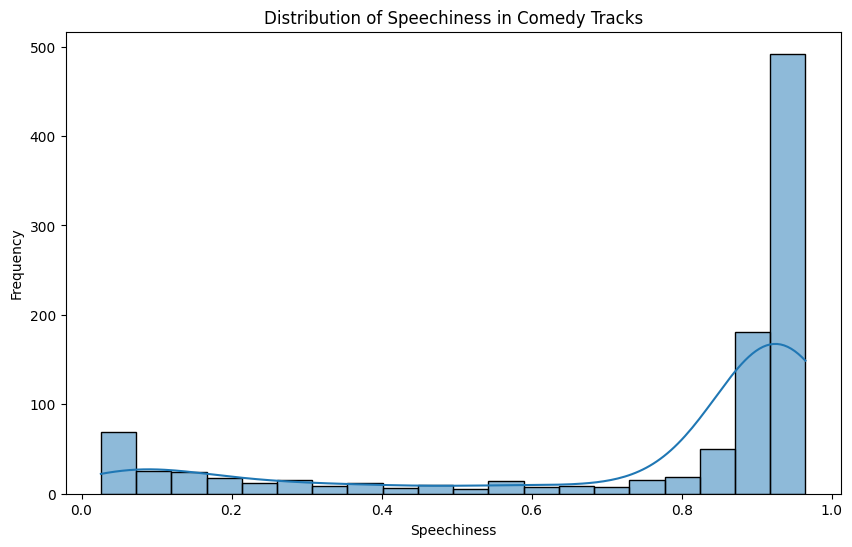

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
18001,18001,6dbSBQXCctYSVryynHXaZ4,Lil Dicky;Chris Brown,Freaky Friday (feat. Chris Brown),Freaky Friday (feat. Chris Brown),45,216631,True,0.755,0.599,...,-5.042,1,0.224,0.1470,0.000000,0.1090,0.755,133.123,4,comedy
18002,18002,7lakl3bPRdQqUGX9m755jX,Lil Dicky,Earth,Earth,40,281500,True,0.694,0.664,...,-4.649,1,0.050,0.6390,0.000000,0.0929,0.676,95.941,4,comedy
18004,18004,5PEleSkK4p4E1sx3x7cOLt,The Lonely Island;Akon,Turtleneck & Chain (Explicit Version),I Just Had Sex,63,166560,True,0.615,0.811,...,-4.316,1,0.144,0.0188,0.000000,0.1960,0.808,167.995,4,comedy
18005,18005,7MkysLvt3L8UFji2PceoFU,Lil Dicky;Brendon Urie,Professional Rapper,Molly (feat. Brendon Urie of Panic at the Disco),66,244339,True,0.829,0.514,...,-6.694,1,0.037,0.2030,0.000157,0.1150,0.397,114.955,4,comedy
18006,18006,1TkWsnheqK0gBtvh07BtNX,Lil Dicky;Fetty Wap;Rich Homie Quan,Professional Rapper,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,64,290835,True,0.858,0.697,...,-5.361,1,0.230,0.1140,0.000000,0.2240,0.364,98.013,4,comedy


In [ ]:
comedy_tracks = raw_data[raw_data['track_genre'] == 'comedy']

plt.figure(figsize=(10, 6))
sns.histplot(comedy_tracks['speechiness'], kde=True, bins=20)
plt.title('Distribution of Speechiness in Comedy Tracks')
plt.xlabel('Speechiness')
plt.ylabel('Frequency')
plt.show()

comedy_tracks[comedy_tracks['speechiness'] < 0.3].head(5)

We can see that not all comedy genre tracks are over the 0.66 speechiness threshold, but a large majority of comedy tracks have a high speechiness value. Looking into the tracks with low speechiness, we can see that they are legitimate songs. Therefore, we can only remove comedy tracks with high speechienss scores, and not all comedy tracks

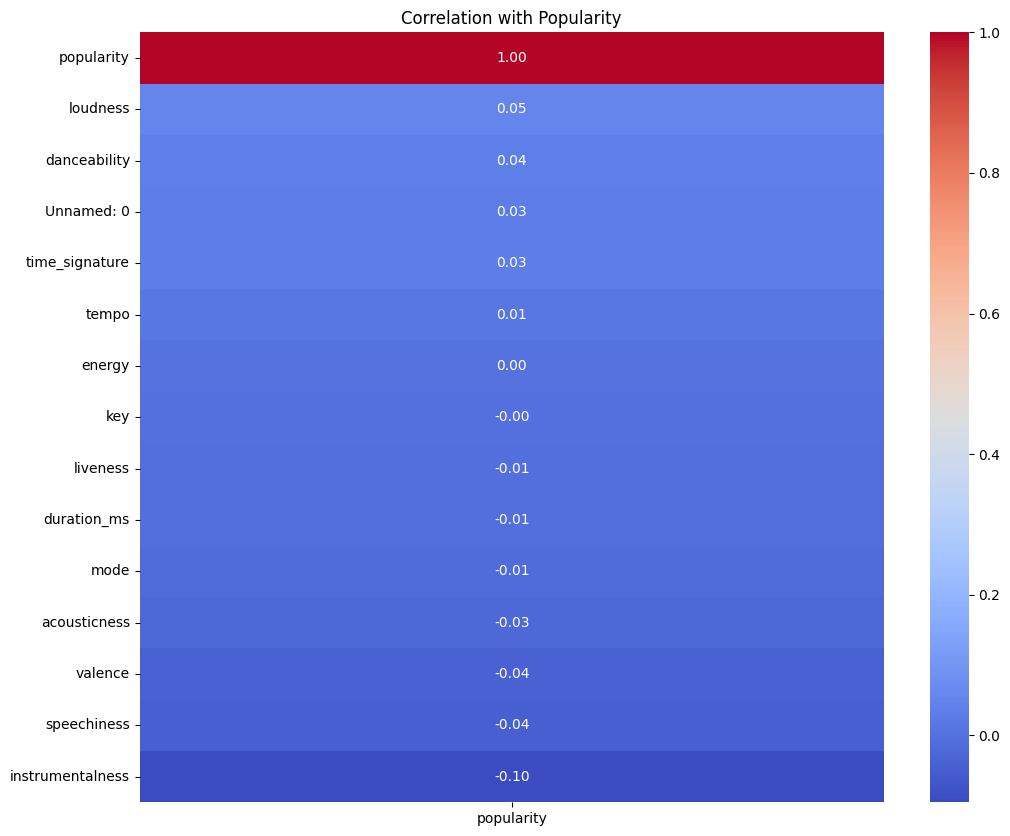

In [ ]:
import seaborn as sns

numerical_cols = raw_data.select_dtypes(include=np.number).columns.tolist()

correlation_matrix = raw_data[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['popularity']].sort_values(by='popularity', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Popularity')
plt.show()

Looking into the correlation of numerical values and the correlation with popularity, we can see instrumentalness has a very low correlation by itself with popularity. When inspecting what "instrumentalness" means, we have decided to remove instrumentalness from our dataset since we don't believe that instrumentalness will be a good predictor for our dependent variable. NOTE: a negative correlation is good to keep because it tells u sthat there is a relationship betwee popularity and instrulmentalness: it is less popular if it is more instrumental. We should use speechiness as a cofounding variable for instrumentalness, and ignore stuff like energy. I think it is worth investigating many variables here despite this correlation chart

In [ ]:

missing_values = raw_data.isnull().sum()

missing_percentage = (missing_values / len(raw_data)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

display(missing_info)

,Missing Values,Percentage
Unnamed: 0,0,0.000000
track_id,0,0.000000
artists,1,0.000877
album_name,1,0.000877
track_name,1,0.000877
popularity,0,0.000000
duration_ms,0,0.000000
explicit,0,0.000000
danceability,0,0.000000
energy,0,0.000000


In [ ]:
missing_rows = raw_data[raw_data.isnull().any(axis=1)]

display(missing_rows)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


We can see that very few rows are missing data from columns. We will remove these few rows to clean our data

In [ ]:
cleaned_data = raw_data.dropna()

drop_columns = ['track_id', 'Unnamed: 0']
cleaned_data = cleaned_data.drop(columns=drop_columns)

display(cleaned_data.head(5))

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.0829,0.167,119.949,4,acoustic


In [ ]:

clean_missing_values = cleaned_data.isnull().sum()

clean_missing_values

clean_missing_percentage = (clean_missing_values / len(raw_data)) * 100

clean_missing_info = pd.DataFrame({'Missing Values': clean_missing_values, 'Percentage': clean_missing_percentage})

display(clean_missing_info)


,Missing Values,Percentage
artists,0,0.0
album_name,0,0.0
track_name,0,0.0
popularity,0,0.0
duration_ms,0,0.0
explicit,0,0.0
danceability,0,0.0
energy,0,0.0
key,0,0.0
loudness,0,0.0


The column name speechiness interested us. We know that sometimes spotify has podcasts or talk shows, and since we are primarily concerned with predicting song popularity, we don't want talk show based entries to pollute our dataset. To check if such entries exist in the dataset, we will find the top ten songs with the most speechiness and check on spotify if these are comedy shows or not

In [ ]:
cleaned_data.nlargest(10, "speechiness")

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature,track_genre
18152,Tenacious D,Post-Apocalypto,turd whistle,26,39426,True,0.630,0.249,4,-14.952,1,0.965,0.353,0.193,0.739,172.243,3,comedy
18504,Tom Papa,Human Mule,The Real World,22,68758,False,0.537,0.548,5,-15.100,0,0.963,0.736,0.745,0.730,179.403,3,comedy
18530,Patton Oswalt,Talking for Clapping,Less and Less Radical,23,207619,True,0.650,0.461,7,-18.317,1,0.963,0.848,0.732,0.365,50.324,4,comedy
18137,Dan Cummins,Get Outta Here; Devil!,Get Rid of That Joke!,25,191399,True,0.604,0.619,5,-13.426,1,0.962,0.682,0.860,0.562,88.668,3,comedy
18227,Patton Oswalt,Talking for Clapping,Parents and Pills,25,202358,True,0.552,0.431,10,-18.837,1,0.962,0.872,0.674,0.448,78.361,4,comedy
18432,Robert Schimmel,Life Since Then,Chemotherapy,22,132520,True,0.599,0.369,6,-20.816,1,0.962,0.921,0.696,0.494,83.026,5,comedy
18663,Tom Papa,Human Mule,The Human Contract,21,339521,False,0.617,0.592,2,-13.854,1,0.962,0.721,0.752,0.465,90.721,4,comedy
18666,Tom Papa,Human Mule,Angry Young Men,21,136820,False,0.587,0.558,11,-14.645,0,0.962,0.795,0.807,0.559,88.127,4,comedy
18674,Tom Papa,Human Mule,Morning Tom,21,213995,False,0.526,0.667,6,-15.417,1,0.962,0.772,0.751,0.259,171.074,4,comedy
18067,Robert Schimmel,Life Since Then,Non Hogkins Lymphoma,28,68520,True,0.689,0.332,2,-19.407,1,0.961,0.873,0.660,0.701,80.739,4,comedy


Checking the found entries, we see that these indeed are comedy shows. We want to check to see if all entries with the genre "comedy" are talk shows, because if they are we can simply remove all entries labeled comedy



In [ ]:
lowest_speechy_comedies = cleaned_data[cleaned_data['track_genre'] == 'comedy'].nsmallest(10, "speechiness")
lowest_speechy_comedies

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature,track_genre
18783,Steve Martin;Steep Canyon Rangers;Paul McCartney,Rare Bird Alert,Best Love,22,261640,False,0.655,0.486,9,-10.748,1,0.0258,0.7850,0.0854,0.802,104.997,4,comedy
18838,Steve Martin;Steep Canyon Rangers,Rare Bird Alert,"Go Away, Stop, Turn Around, Come Back",21,215573,False,0.522,0.601,9,-8.812,1,0.0278,0.6670,0.1470,0.674,107.244,4,comedy
18826,"""Weird Al"" Yankovic",Polka Party,Good Enough for Now,22,183333,False,0.661,0.412,3,-13.015,1,0.0291,0.0475,0.2090,0.855,130.758,4,comedy
18526,Stephen Lynch,A Little Bit Special,HermAphrodite,23,169213,True,0.483,0.424,0,-7.724,1,0.0292,0.4980,0.1000,0.256,114.717,4,comedy
18396,Linda P,Just Divorced,Støttesang til Realititydeltagerne,24,241938,False,0.552,0.623,1,-5.303,1,0.0294,0.1670,0.0842,0.395,75.030,4,comedy
18529,Jason Manford,A Different Stage,"This Is The Moment - From ""Jekyll And Hyde""",23,219240,False,0.399,0.223,5,-11.461,1,0.0298,0.5940,0.0650,0.117,66.532,4,comedy
18606,Stephen Lynch,My Old Heart,My Old Heart,22,314480,True,0.668,0.203,4,-10.825,1,0.0298,0.8890,0.1040,0.217,138.812,4,comedy
18524,Steve Martin;Steep Canyon Rangers,Rare Bird Alert,More Bad Weather On The Way,22,211960,False,0.549,0.545,5,-9.162,1,0.0299,0.8010,0.1350,0.910,127.129,4,comedy
18379,Stephen Lynch,A Little Bit Special,Gerbil,24,184413,True,0.640,0.343,9,-8.999,0,0.0300,0.6780,0.1330,0.406,109.854,4,comedy
18577,Stephen Lynch,3 Balloons,You (Prettier Than),22,176080,False,0.535,0.261,9,-10.932,1,0.0305,0.3970,0.1240,0.373,130.518,4,comedy


We see that there are in fact some comedy songs that aren't sets. What this tells us is that for the comedy genre at least, speechiness is accurate and is not making mistakes by having comedy songs have low speechiness values. These songs accurately are comedy and have low speechiness values. This means that as a next step, we can probably find an acceptible max for speechiness and filter out all entries above that to remove podcast type entries.

The dataest description on huggingface says that most songs above 0.66 likely aren't music, and are mostly talking, so I want to test this and see if this is true. We want to be able to remove entries that are mostly just talking if possible, so need to find good threshold to do this

In [12]:
filtered_speechiness = raw_data[raw_data['speechiness'] > 0.70]
pd.set_option("display.max_columns", None)
filtered_speechiness.nsmallest(10, "speechiness")

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
37271,37271,52bLd4UewbjeGCfNULYwcr,Mc Kadu;Dj Victor;MC GP;Mc Paiva ZS;Mc Lekão;D...,Role Na Sul,Role Na Sul,53,344470,False,0.808,0.498,9,-4.857,0,0.701,0.6150,0.0,0.0760,0.750,113.011,5,funk
87852,87852,7rWLqeQJabrK7FbY8X0TyI,22Gz,Growth & Development,"Suburban, Pt. 2",67,190746,True,0.830,0.574,11,-6.892,1,0.701,0.2810,0.0,0.1240,0.538,143.892,4,r-n-b
37532,37532,1W0sYOma39HqEh4UO8Aq3i,Menor MC;DJ Matt D,Trap Funk Star,Líquido Roxo,47,123769,False,0.845,0.308,1,-9.717,0,0.703,0.0433,0.0,0.1620,0.346,134.442,4,funk
18846,18846,1NshHftLkdJcrMnCNqQf3U,Hva Snakker Du Om?;Anders Matthesen;Bossy Bo,Den Ka' Byttes V:O:L:01:00,Matros I Skumsprøjt Med Stormvejr og Stiv Kuli...,23,35293,False,0.698,0.438,2,-11.355,1,0.705,0.6980,0.0,0.4440,0.691,139.707,3,comedy
96635,96635,02UfBmMerddIN9u4AF7srK,Maria Bethânia,Amor Festa Devoção Ao Vivo,Explode Coração - Ao Vivo,38,100853,False,0.517,0.301,9,-12.007,1,0.705,0.9120,0.0,0.9200,0.331,75.318,3,samba
37341,37341,6BvxXU49ho2foOtgd4dgXb,MC Hariel,"Chora Agora, Ri Depois",Espancando Recalque,51,241670,False,0.765,0.489,6,-8.782,1,0.708,0.4300,0.0,0.1720,0.792,170.155,4,funk
18848,18848,1JGFhhbcEDikq0xxuAI0Mk,Kathleen Madigan,Bothering Jesus,Drinking & Ireland,21,280366,True,0.472,0.855,0,-7.011,1,0.709,0.7870,0.0,0.9310,0.381,123.001,3,comedy
18508,18508,2iEc9ZUjvNz2UIbhjhD6B2,Todd Glass,Todd Glass Talks About Stuff,Health Department D's and Dinner Parties,22,336946,True,0.575,0.945,4,-2.385,1,0.712,0.8390,0.0,0.7520,0.600,115.992,4,comedy
18609,18609,57x3MBUs9IE0vlZVDtrYax,Tracy Morgan,Bona Fide,Brooklyn,22,138930,True,0.385,0.951,6,-4.562,1,0.714,0.4890,0.0,0.9690,0.106,178.790,4,comedy
60557,60557,0uOyiK3VTTvzSCmueayaKF,Popcaan;Furnace,Rich Symptom,Rich Symptom,22,163160,True,0.695,0.440,9,-7.857,0,0.714,0.1390,0.0,0.0721,0.498,136.929,5,j-dance


In [38]:
filtered_com_speechiness = raw_data[raw_data['speechiness'] > 0.70]
filtered_com_peechiness = filtered_com_speechiness[filtered_com_speechiness['track_genre'] == 'comedy']
filtered_com_peechiness.nsmallest(10, "speechiness")

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
18846,18846,1NshHftLkdJcrMnCNqQf3U,Hva Snakker Du Om?;Anders Matthesen;Bossy Bo,Den Ka' Byttes V:O:L:01:00,Matros I Skumsprøjt Med Stormvejr og Stiv Kuli...,23,35293,False,0.698,0.438,2,-11.355,1,0.705,0.698,0.000000,0.444,0.691,139.707,3,comedy
18848,18848,1JGFhhbcEDikq0xxuAI0Mk,Kathleen Madigan,Bothering Jesus,Drinking & Ireland,21,280366,True,0.472,0.855,0,-7.011,1,0.709,0.787,0.000000,0.931,0.381,123.001,3,comedy
18508,18508,2iEc9ZUjvNz2UIbhjhD6B2,Todd Glass,Todd Glass Talks About Stuff,Health Department D's and Dinner Parties,22,336946,True,0.575,0.945,4,-2.385,1,0.712,0.839,0.000000,0.752,0.600,115.992,4,comedy
18609,18609,57x3MBUs9IE0vlZVDtrYax,Tracy Morgan,Bona Fide,Brooklyn,22,138930,True,0.385,0.951,6,-4.562,1,0.714,0.489,0.000000,0.969,0.106,178.790,4,comedy
18954,18954,5oB1UnrgyBPQLtkVWsDwI7,Clinton Jackson,Do You See the Ducks Now,The Make-up Girl,19,105626,False,0.449,0.977,1,-6.057,1,0.719,0.791,0.000000,0.427,0.177,119.938,1,comedy
18449,18449,0WVGfCs97aWDvJGBPMFMI0,Kathleen Madigan,Bothering Jesus,Car Crash vs Plane Crash,23,106001,False,0.543,0.828,10,-6.980,0,0.731,0.816,0.000000,0.748,0.691,130.355,4,comedy
18983,18983,4BB3ZRYYwRlBzNj6WUVrUj,Louis Katz,If These Balls Could Talk,Weird Sex Moves,20,104760,True,0.502,0.895,11,-4.932,1,0.731,0.884,0.000000,0.940,0.556,122.856,3,comedy
18423,18423,6aOzlhzJ5BemEkB9TXhNKo,D.L. Hughley,Notes from the G.E.D. Section,What I Learned from the News,22,125520,True,0.572,0.927,5,-5.428,1,0.732,0.780,0.000000,0.911,0.583,93.277,3,comedy
18945,18945,4wWtnRpttsyMaJBVV9ZsR7,Kathleen Madigan,Bothering Jesus,Last Call from Jail,21,194510,False,0.469,0.912,6,-7.161,0,0.733,0.779,0.000000,0.860,0.309,135.928,3,comedy
18217,18217,32Q994Bms8PgeoOBL3KViD,Stuart Thompson,Dandy Man,Gun Range,25,160257,True,0.553,0.867,2,-10.140,1,0.734,0.895,0.000003,0.600,0.866,92.780,1,comedy


Want to remove songs that are too short---these could either be irrelevant entires like album vignettes or interludes, or these could be bad data entries. Either way, good to check out


In [ ]:
cleaned_data.nsmallest(20, "duration_ms")

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature,track_genre
59310,Leila Bela,Angra Manyu,The Exorsism Begins...,0,8586,False,0.000,0.0400,8,-29.714,0,0.0000,0.9280,0.1150,0.0000,0.000,0,iranian
59812,Leila Bela,Angra Manyu,V-4,0,13386,False,0.000,0.2240,11,-22.196,1,0.0000,0.9700,0.9070,0.0000,0.000,0,iranian
59775,Leila Bela;Leila's Opera Class,Angra Manyu,Screams for a Finale! (feat. Leila's Opera Class),0,15800,False,0.251,0.5080,5,-10.564,0,0.3160,0.9690,0.9520,0.0000,184.051,3,iranian
16856,Wolfgang Amadeus Mozart;Ingrid Haebler,Mozart: The Complete Piano Sonatas,"Andante in C Major, K. 1a",0,17453,False,0.467,0.0301,2,-28.518,0,0.0428,0.9950,0.1240,0.0000,84.375,4,classical
16288,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 20, Pause (Live in Japan,...",0,17826,False,0.372,0.2780,8,-16.882,1,0.0370,0.9850,0.1640,0.9120,89.032,1,classical
39233,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 20, Pause (Live in Japan,...",0,17826,False,0.372,0.2780,8,-16.882,1,0.0370,0.9850,0.1640,0.9120,89.032,1,german
59306,Leila Bela,Angra Manyu,V-7,0,21120,False,0.229,0.0577,8,-27.960,0,0.1960,0.6260,0.1080,0.2530,172.897,4,iranian
59609,Leila Bela,Angra Manyu,Shatter,0,21240,False,0.424,0.8690,9,-8.168,0,0.0728,0.7070,0.1170,0.0000,135.107,4,iranian
11398,Benjamin Britten;Steven Isserlis,October Classical Playlist,"Cello Suite No. 3, Op. 87: IX. Passacaglia (Ex...",0,22266,False,0.335,0.0593,11,-26.365,0,0.0430,0.9920,0.1160,0.1950,77.266,5,british
16292,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 13, Estrella (Live in Jap...",0,23506,False,0.379,0.2370,5,-18.265,1,0.0470,0.9930,0.1440,0.4770,116.093,4,classical


Longest songs are dj mixes, which I guess is okay to keep. Can't see why that would warrant getting axed. There also seemt to be very few songs that are short that aren't actually songs, so I guess it's okay for them too

Final thing I want to check for outliers is loudness. If a track is just silent, it probably shouldn't be included.

In [ ]:
cleaned_data.nsmallest(50, "loudness")

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature,track_genre
101888,White Noise Sleep Sounds,Soothing White Noise,Soothing White Noise - Loopable With No Fade,32,65248,False,0.0000,0.000687,10,-49.531,0,0.0000,0.908000,0.1010,0.00000,0.000,0,sleep
101538,White Noise Sleep Sounds,Soothing White Noise,White Noise - Loopable With No Fade,37,74217,False,0.0000,0.003320,10,-49.307,0,0.0000,0.910000,0.1010,0.00000,0.000,0,sleep
101722,Atmosphere Asmr,Fan Sounds & White Noise 2 (Deluxe Edition),Ceiling Fan Sound on Low Power,34,120000,False,0.1620,0.004830,6,-46.591,0,0.0507,0.924000,0.1100,0.03270,138.768,4,sleep
101360,White Noise for Babies;Crickets;Baby Sleep Sounds,Cricket Sounds,Cricket Sound 4 - Loopable With No Fade,54,71000,False,0.4610,0.003250,10,-46.251,0,0.0639,0.915000,0.0594,0.07280,111.653,4,sleep
79719,Lazar Berman,Inedito (Unpublished),Chaconne in sol maggiore : Variazione 9,58,63840,False,0.3870,0.001810,7,-43.957,0,0.0632,0.995000,0.0996,0.47500,98.691,4,piano
101972,Binaural Beats;White Noise Babies;Binaural Bea...,Airconditioner Noise,Nap in the Afternoon Box Fan,32,60000,False,0.1880,0.414000,1,-43.943,0,0.0720,0.996000,0.1030,0.00994,136.862,4,sleep
101968,Relaxing Music Therapy;4D Nature Recordings;Cr...,Night Crickets for Babies,Loopable Woods,32,99778,False,0.3810,0.086000,9,-43.714,1,0.0459,0.197000,0.1830,0.04000,137.552,3,sleep
101476,Wave Sounds For Sleep,Wave Sounds For Baby Sleep,Sleep Sound For Babies - Underwater,36,139661,False,0.2440,0.145000,10,-43.504,0,0.0494,0.970000,0.0926,0.16200,138.094,4,sleep
79591,Brian Lyndon,Wake with me,Wake with me,60,135647,False,0.2770,0.001760,0,-43.303,1,0.0485,0.990000,0.1030,0.07950,110.541,4,piano
101397,White Noise Babies;White Noise For Baby Sleep,Loopable White Noise,Clean White Noise - Loopable With No Fade - Wh...,39,67682,False,0.0000,0.000020,10,-43.046,1,0.0000,0.974000,0.1010,0.00000,0.000,0,sleep


We see the genre "sleep." We likely do not want white noise or fan sounds to be accounted for here. let's check values with the sleep genre to see if there are any non-white noise tracks

After some analysis I see that there are about 100 songs classified under the sleep genre. A LOT of them are white noise tracks, some are not. I really think that given the relative size of the dataset, and the amount of dat in the sleep genre, we can just remove them all and not worry terribly about adverse effects. I will add the code that removes the sleep genre to the cleaned data section

In [5]:
cleaned_data = raw_data.dropna()

drop_columns = ['track_id', 'album_name', 'artists', 'track_name', 'Unnamed: 0']
cleaned_data = cleaned_data.drop(columns=drop_columns)
cleaned_data = cleaned_data[cleaned_data['track_genre'] != 'sleep']

display(cleaned_data.head(5))

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
sleep_tracks = cleaned_data[cleaned_data['track_genre'] == 'sleep']
sleep_tracks.count()

,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0


Now sleep tracks are removed. Still need to check speechiness tracks and remove a bunch of those. I wanna check all genres to see if there are any other genres like sleep which may be potentially bad

In [ ]:
cleaned_data["track_genre"].unique()


array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

All good, no particularly bad columns.

Based on domain knowledge, I would recommend we look into the following variables as potential predictors:

 Loudness  -- might be slightly correlated with genre so just be aware. In general a lot will probably be correlated with or confounding with genre

 duration -- are longer songs better?

 explicit -- unsure of if this will matter much, but worth checking with regression models

 danceability -- unsure if this really is accurately determined by creator of dataset, still worht checking out tho

 Key -- could be interesting. Might need to clean data some more checking how many are of vlaue -1, and don't have a detected key. This could decide if we use this or not

 Mode -- also need to check that all values are 1 or 0 here as part of data cleaning

 Valence -- are sad songs more popular? Interesting to check out

 tempo -- this and itme signiture core identities to songs, so def worth analyzing

 time signiture -- see tempo

 track_genre -- clearly worth checking

 speechiness -- insteresting to see diff between vocal and non-vocal songs. confounds for instrumentalness, so worth checking bc instrumentalness was correlated with popularity.

 (MAYBE) check out instrulmentalness to see if it correlates more with popularity than speechiness, despite our writing it off as speechiness confounding for it

 Dancibility

variables we can probably ignore


Below I will do more eda to potentially clean--- stuff like checknig how many values are in an undetermined key, and making sure all vlaues in mode are either 1s or 0s.

In [6]:
checking_mode = cleaned_data[~cleaned_data['mode'].isin([0,1])]
checking_mode.shape

(0, 16)

mode looks good

In [9]:
checking_key = cleaned_data[cleaned_data['key'] == -1]
checking_key.sum()
cleaned_data.nsmallest(20, "key")

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
8,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.669,130.088,4,acoustic
18,68,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.669,130.088,4,acoustic
21,63,174174,False,0.678,0.3510,0,-8.654,1,0.0266,0.7470,0.000000,0.3550,0.569,90.032,4,acoustic
33,0,259558,False,0.296,0.2060,0,-11.799,1,0.0412,0.7820,0.000225,0.0959,0.202,165.400,4,acoustic
34,0,259558,False,0.296,0.2060,0,-11.799,1,0.0412,0.7820,0.000225,0.0959,0.202,165.400,4,acoustic
35,0,259558,False,0.296,0.2060,0,-11.799,1,0.0412,0.7820,0.000225,0.0959,0.202,165.400,4,acoustic
50,46,213098,False,0.596,0.2000,0,-10.424,0,0.0305,0.9100,0.000183,0.0884,0.308,107.893,4,acoustic
51,61,232360,False,0.373,0.9140,0,-4.185,1,0.0565,0.0760,0.000000,0.6690,0.560,168.210,4,acoustic


Seems like no keys are undetected--all of them have a detecteed key

Sill gotta check speechiness

In [15]:
raw_data.nsmallest(20, "danceability")

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
4131,4131,59gg6zQhSKGVnkT3hWAY3l,Max Richter;Lang Lang,Voyager - Essential Max Richter,The Departure,64,151506,False,0.0,0.03620,0,-22.519,0,0.0,0.994,0.940000,0.0958,0.0,0.0,0,ambient
4379,4379,4acmzQsAeMJa5sGFSog7fu,Dario Marianelli;Jack Liebeck;Benjamin Wallfisch,Jane Eyre - Original Motion Picture Soundtrack,The End of Childhood (feat. Jack Liebeck),55,73266,False,0.0,0.04450,0,-26.440,0,0.0,0.972,0.972000,0.0873,0.0,0.0,0,ambient
4664,4664,1Kb2DqjHRvOcT5xeWtz3t5,Sylvain Chauveau,Des Plumes Dans La Tête,Ferme Les Yeux,53,68493,False,0.0,0.03230,2,-23.636,0,0.0,0.994,0.973000,0.0922,0.0,0.0,0,ambient
45670,45670,6B9Mgf9smWqxDjA35VD6MK,Little Symphony,Rialto Beach,Campomoro,22,148711,False,0.0,0.00108,0,-30.204,1,0.0,0.952,0.991000,0.2420,0.0,0.0,0,guitar
45720,45720,7i5OoyPXtSrqz9jobJfG1F,Little Symphony,Rialto Beach,Ritornello,23,102000,False,0.0,0.00129,7,-29.445,1,0.0,0.969,0.956000,0.1230,0.0,0.0,0,guitar
45729,45729,0pTAEdockvKVSq1hhFqk7O,Little Symphony,Rialto Beach,Amager,22,133624,False,0.0,0.00400,0,-28.326,1,0.0,0.970,0.959000,0.1090,0.0,0.0,0,guitar
45773,45773,1keWmyG6qyBbMagPBdgUKr,Little Symphony,Rialto Beach,Ionian,22,93125,False,0.0,0.02680,7,-30.100,1,0.0,0.964,0.993000,0.1240,0.0,0.0,0,guitar
59221,59221,5BcyxCXrXuw4vsAqAiObWM,Leila Bela,Angra Manyu,Yes! No! I Mean Yes! No I Don't!,0,38333,False,0.0,0.57200,8,-16.286,1,0.0,0.872,0.000175,0.1190,0.0,0.0,0,iranian
59310,59310,6hsyfegVY5yklJneM40mWi,Leila Bela,Angra Manyu,The Exorsism Begins...,0,8586,False,0.0,0.04000,8,-29.714,0,0.0,0.928,0.956000,0.1150,0.0,0.0,0,iranian
59473,59473,48Nt8u7kYSTwE6axtE9hJO,Leila Bela,Angra Manyu,Leaving Her Quantum Journey Behind...,0,50186,False,0.0,0.03140,5,-28.194,0,0.0,0.723,0.000067,0.1290,0.0,0.0,0,iranian


In [16]:
zero_tempo = raw_data[raw_data["tempo"] == 0]
zero_tempo.shape

(157, 21)

In [32]:
zero_time = raw_data[raw_data["time_signature"] < 4]
zero_time.shape

(10331, 21)

In [19]:
low_tempo = raw_data[raw_data["tempo"] < 30]
low_tempo.shape

(174, 21)

Cleaning songs with time signature below 3, and songs with tempo below 30

In [47]:
cleaned_data = raw_data.dropna()

drop_columns = ['track_id', 'album_name', 'artists', 'track_name', 'Unnamed: 0']
cleaned_data = cleaned_data.drop(columns=drop_columns)
cleaned_data = cleaned_data[cleaned_data['track_genre'] != 'sleep']
cleaned_data = cleaned_data[cleaned_data["time_signature"] > 3]
cleaned_data = cleaned_data[cleaned_data["tempo"] > 30]
cleaned_data = cleaned_data[cleaned_data["speechiness"] < 90]
cleaned_data = cleaned_data[~(
    (cleaned_data["speechiness"] < 70) &
    (cleaned_data["track_genre"] == "comedy"))
]
cleaned_data.shape

(102496, 16)

I think this is a pretty good cleaned version. We got rid of all sleep tracks, invalid time signitures, invalid tempos, songs likely to not be songs but stories or comedy routines, and removed columns which are strings that shouldn't be considered (as we want song popularity to be determined by the song's intrinsic qualities, finding which types of songs are most popular, not which artists are most popular)